# BODS simulator [DRAFT]

This notebook contains code that simulates BODS-like data from a specified number of owners. 

**DISCLAIMER: This is very much in development and will not produce valid BODS data in all circumstances.** Some additional, non-comprehensive points:

- Currently writes BODS 0.2 data
- Currently doesn't deal with component IDs or indirect interests
- All persons and companies have made-up names, and are from the UK
- Currently each person can only own one company but companies can be owned by mutiple people or entities

## Setup

### GOOGLE COLAB ONLY - import files

In [4]:
!wget https://raw.githubusercontent.com/lgs85/bods_simulator/main/bods_simulator.py
!wget https://raw.githubusercontent.com/lgs85/bods_simulator/main/requirements.txt

/bin/bash: wget: command not found
/bin/bash: wget: command not found


### Install dependencies

This section only needs to be run once (or once per session if using Colab)

In [5]:
%pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.


### Import functions

Import the `sim_bo` function from the `bods_simulator` module

In [8]:
import bods_simulator as bs
import matplotlib.pyplot as plt
import igraph as ig
import json

## Simulate an ownership chain with a single beneficial owner

### Run the function

The `sim_bo` function takes three *arguments* to simulate beneficial ownership data for a single declaring entity. These are:
- `n_person_owners`: the number of natural persons involved in ownership of the declaring entity. Must be a whole number.
- `n_entity_owners`: the number of entities involved in ownership of the declaring entity. Must be a whole number.
- `format` is a rudimentary option for varying how you want your ownership chain to look, described below. Must be either 'long' or 'wide'

When running the function, two objects are returned. These are (in order):
- An `igraph` graph object, which is a network of the ownership chain
- A list of BODS statements

To run the function and return the graph and list of statements to two objects names `g` and `statements`, respectively, we use the following:

In [9]:
g, statements = bs.sim_bo(n_person_owners = 1,n_entity_owners = 0,format = 'wide')

### Explore the graph output

We can plot the graph to have a look at the data using igraph's plot function. This confirms we have an ownership chain involving one company (the declaring company) and one person

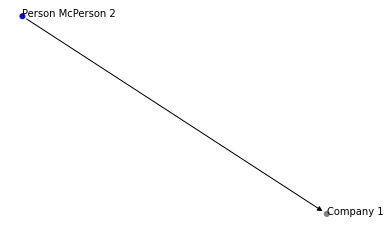

In [10]:
fig,ax = plt.subplots()
plt.axis('off')
ig.plot(g,target = ax,vertex_color = g.vs['color'],vertex_label = g.vs['label'])

### Explore and write the BODS statements

The statments are returned as python lists and dictionaries. To display in JSON format we can use `dumps` from the `json` library. You should be able to run and copy the output below and paste it into the [BODS data review tool](https://datareview.openownership.org) and (hopefully!) pass the checks. You should also be able to paste the output into the [BODS visualiser](https://www.openownership.org/en/publications/beneficial-ownership-visualisation-system/bods-data-visualiser/)

In [15]:
print(json.dumps(statements,indent=2))

[
  {
    "statementID": "n2kuzkbuyxzkffe6wtiezosf3ecmoutk",
    "statementType": "entityStatement",
    "isComponent": false,
    "statementDate": "2022-05-27",
    "entityType": "registeredEntity",
    "name": "Company 1",
    "identifiers": [
      {
        "scheme": "GB-COH",
        "id": "02484364"
      }
    ],
    "publicationDetails": {
      "publicationDate": "2022-05-27",
      "bodsVersion": "0.2",
      "publisher": {
        "name": "Company 1"
      }
    }
  },
  {
    "statementID": "g9cgb2xo108r20bdylbpfrf9dbpanilh",
    "statementType": "personStatement",
    "isComponent": false,
    "statementDate": "2022-05-27",
    "personType": "knownPerson",
    "nationalities": [
      {
        "code": "GB"
      }
    ],
    "names": [
      {
        "type": "individual",
        "fullName": "Person McPerson 2",
        "givenName": "Person",
        "familyName": "McPerson 2"
      }
    ],
    "publicationDetails": {
      "publicationDate": "2022-05-27",
      "bodsVe

Finally you can write to a file and download the json if you wish, to explore in your favourite text editor, with the following:

In [16]:
with open('myfile.json', 'w') as f:
    json.dump(statements, f,indent = 2)
#files.download('myfile.json') #uncomment if using colab

## Simulate an ownership chain with multiple owners in 'wide' format

### Run and plot

Here we'll use the same code as above to explore more complex ownership chains. Let's simulate a company with 5 entity owners and 5 person owners, in wide format, and plot the output as above. Try running this a few times and you'll say that the graph is slightly different each time. This is because there is an element of randomness in ownership statements where larger chains are simulated.

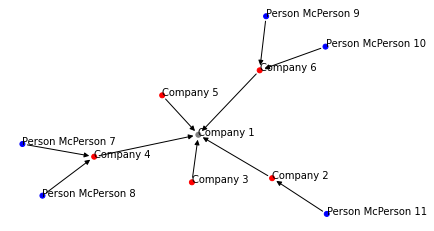

In [17]:
g,statements = bs.sim_bo(n_person_owners = 5,n_entity_owners = 5,format = 'wide')
fig,ax = plt.subplots()
plt.axis('off')
ig.plot(g,target = ax,vertex_color = g.vs['color'],vertex_label = g.vs['label'])

### Get JSON and check

Print the JSON to screen and try running against the [BODS data review tool](https://datareview.openownership.org) and the [BODS visualiser](https://www.openownership.org/en/publications/beneficial-ownership-visualisation-system/bods-data-visualiser/). For some of these more complex chains we might get some warnings in the data review tool. This is because the complexities of indirect ownership haven't yet been captured in the simulations.

In [18]:
print(json.dumps(statements,indent=2))

[
  {
    "statementID": "ppadaur7c7ehispv7l74xj99kx49vycl",
    "statementType": "entityStatement",
    "isComponent": false,
    "statementDate": "2022-05-27",
    "entityType": "registeredEntity",
    "name": "Company 1",
    "identifiers": [
      {
        "scheme": "GB-COH",
        "id": "20636196"
      }
    ],
    "publicationDetails": {
      "publicationDate": "2022-05-27",
      "bodsVersion": "0.2",
      "publisher": {
        "name": "Company 1"
      }
    }
  },
  {
    "statementID": "tqigvjfkztlgabsyexp1pttu8xw7v1pr",
    "statementType": "entityStatement",
    "isComponent": true,
    "statementDate": "2022-05-27",
    "entityType": "registeredEntity",
    "name": "Company 2",
    "identifiers": [
      {
        "scheme": "GB-COH",
        "id": "32510865"
      }
    ],
    "publicationDetails": {
      "publicationDate": "2022-05-27",
      "bodsVersion": "0.2",
      "publisher": {
        "name": "Company 1"
      }
    }
  },
  {
    "statementID": "3p87b8mpb

## Simulate an ownership chain with multiple owners in 'long' format

### Run and plot
Long format only makes a difference where there is at least one entity owner, and structures the ownership chain as a long chain of companies with all natural persons at the end. If we run the same example as above but in long format we get the following:

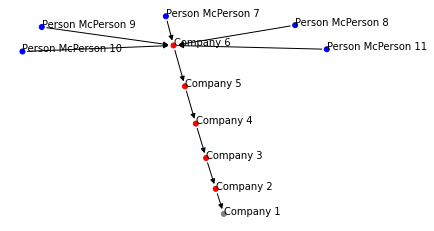

In [20]:
g,statements = bs.sim_bo(n_person_owners = 5,n_entity_owners = 5,format = 'long')
fig,ax = plt.subplots()
plt.axis('off')
ig.plot(g,target = ax,vertex_color = g.vs['color'],vertex_label = g.vs['label'])

### Get JSON and check

Print the JSON to screen and try running against the [BODS data review tool](https://datareview.openownership.org) and the [BODS visualiser](https://www.openownership.org/en/publications/beneficial-ownership-visualisation-system/bods-data-visualiser/). Again, these won't be 100% BODS compliant at the moment but should provide an idea.

In [21]:
print(json.dumps(statements,indent=2))

[
  {
    "statementID": "kwh1t4b0tkklhuu6jitcf4njxn5zqxj5",
    "statementType": "entityStatement",
    "isComponent": false,
    "statementDate": "2022-05-27",
    "entityType": "registeredEntity",
    "name": "Company 1",
    "identifiers": [
      {
        "scheme": "GB-COH",
        "id": "35352528"
      }
    ],
    "publicationDetails": {
      "publicationDate": "2022-05-27",
      "bodsVersion": "0.2",
      "publisher": {
        "name": "Company 1"
      }
    }
  },
  {
    "statementID": "p9tr2t4bo66biu413q5p42sk8zqh8ni0",
    "statementType": "entityStatement",
    "isComponent": true,
    "statementDate": "2022-05-27",
    "entityType": "registeredEntity",
    "name": "Company 2",
    "identifiers": [
      {
        "scheme": "GB-COH",
        "id": "93013051"
      }
    ],
    "publicationDetails": {
      "publicationDate": "2022-05-27",
      "bodsVersion": "0.2",
      "publisher": {
        "name": "Company 1"
      }
    }
  },
  {
    "statementID": "zkb0eqpg9